## Sentiment Analysis of Marc Cucurella's Transfer News
On the 5th of August an official announcement was made by the Chelsea football club official twitter handle, confirming the news of their new contract with Spanish Professional football star, Marc Cucurella.
This announcement sparked a lot of reaction from Twitter users. 
This aim of this project is to get an overview of how Twitter Users reacted to this announcement.

For the success of this project, I downloaded and installed packages from different Python libraries which I used to scrape data from twitter, clean my data, process my texts and futher carry out the sentiment analysis.

In [1]:
## importing relevant packages
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from PIL import Image
import pandas as pd
import numpy as np
import string
import random
import json
import requests
import re
import csv
import spacy
import datetime as dt
from wordcloud import WordCloud
import tweepy
from textblob import TextBlob
from emot.emo_unicode import UNICODE_EMOJI
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kelechi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kelechi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kelechi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelechi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Consumer_Key = '**********#####*#*#*#**#*#*'
Consumer_Secret = '**************************************'
Access_Token = '*********************************************'
Access_Token_Secret = '***************************************'

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth, wait_on_rate_limit = True)
sleep_on_rate = False


In [ ]:
# Downloading Tweets where Cucurella was mentioned from 5th - 6th of August
search_words = 'Cucurella'
dataset = tweepy.Cursor(api.search_tweets, q=search_words, tweet_mode='extended', lang ='en').items()


for tweet in dataset:
    if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
        start_date = ('2022-08-01')
        end_date = ('2022-08-04')
        text=tweet.full_text
        tweet_id = tweet.id
        tweeted_from = tweet.user.location
        time_of_tweet =tweet.created_at 
        num_of_retweets = tweet.retweet_count
        num_of_likes=tweet.favorite_count
        with open('signing_cucurella111.csv','a', newline='', encoding='utf-8') as csvFile:
            csv_writer = csv.writer(csvFile, delimiter=',') 
            csv_writer.writerow([ text, tweet_id, tweeted_from, time_of_tweet, num_of_retweets, num_of_likes]) 
    

    
    


## Loading the CSV data into a dataframe

In [2]:
cucurella_df = pd.read_csv('marc.csv')

### To add column Headers to the Data frame

In [3]:
cucurella_df.to_csv('marc.csv',header =['tweet_text', 'tweet_id', 'tweeted_from', 'time_of_tweet', 'num_of_retweets', 'num_of_likes'], index = False)


In [4]:
marc_cucurella_df = pd.read_csv('marc.csv')
marc_cucurella_df

,tweet_text,tweet_id,tweeted_from,time_of_tweet,num_of_retweets,num_of_likes
0,@M_Cucurella Just watched his Chelsea days😭💔,1556804307135119360,"Aleiro, Nigeria",2022-08-09 00:47:25+00:00,0,0
1,I know it’s early to say coz he hasn’t even ma...,1556803437601427456,United Kingdom,2022-08-09 00:43:58+00:00,0,0
2,@YouBettaLeggett @TOSOTC_CFC Cucurella has to ...,1556802149702684673,London. England,2022-08-09 00:38:51+00:00,0,1
3,i genuinely thought that was cucurella for a s...,1556800296315232258,Northern Ireland 🇬🇧,2022-08-09 00:31:29+00:00,0,0
4,"@FelixJohnston_ As long as Cucurella starts, I...",1556797247672569856,NaN,2022-08-09 00:19:22+00:00,0,0
...,...,...,...,...,...,...
26726,Welcome to the biggest club in London Cucurell...,1555514200247746560,NaN,2022-08-05 11:21:00+00:00,0,3
26727,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",2022-08-05 11:20:59+00:00,1,1
26728,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",2022-08-05 11:20:59+00:00,0,0
26729,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,2022-08-05 11:20:58+00:00,0,0


In [5]:
# To get an overview of my dataset in order to ensure that data is stored in the right datatype
marc_cucurella_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26731 entries, 0 to 26730
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_text       26731 non-null  object
 1   tweet_id         26731 non-null  int64 
 2   tweeted_from     16607 non-null  object
 3   time_of_tweet    26731 non-null  object
 4   num_of_retweets  26731 non-null  int64 
 5   num_of_likes     26731 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


In [6]:
# To convert the time_of_tweet into a datetime data type
pd.to_datetime(marc_cucurella_df.time_of_tweet)

0       2022-08-09 00:47:25+00:00
1       2022-08-09 00:43:58+00:00
2       2022-08-09 00:38:51+00:00
3       2022-08-09 00:31:29+00:00
4       2022-08-09 00:19:22+00:00
                   ...           
26726   2022-08-05 11:21:00+00:00
26727   2022-08-05 11:20:59+00:00
26728   2022-08-05 11:20:59+00:00
26729   2022-08-05 11:20:58+00:00
26730   2022-08-05 11:20:58+00:00
Name: time_of_tweet, Length: 26731, dtype: datetime64[ns, UTC]

In [7]:
# To remove time from the date_of_tweet column
marc_cucurella_df = pd.read_csv('marc.csv', parse_dates=['time_of_tweet'])
marc_cucurella_df['date_of_tweet'] = marc_cucurella_df['time_of_tweet'].dt.date
marc_cucurella_df

,tweet_text,tweet_id,tweeted_from,time_of_tweet,num_of_retweets,num_of_likes,date_of_tweet
0,@M_Cucurella Just watched his Chelsea days😭💔,1556804307135119360,"Aleiro, Nigeria",2022-08-09 00:47:25+00:00,0,0,2022-08-09
1,I know it’s early to say coz he hasn’t even ma...,1556803437601427456,United Kingdom,2022-08-09 00:43:58+00:00,0,0,2022-08-09
2,@YouBettaLeggett @TOSOTC_CFC Cucurella has to ...,1556802149702684673,London. England,2022-08-09 00:38:51+00:00,0,1,2022-08-09
3,i genuinely thought that was cucurella for a s...,1556800296315232258,Northern Ireland 🇬🇧,2022-08-09 00:31:29+00:00,0,0,2022-08-09
4,"@FelixJohnston_ As long as Cucurella starts, I...",1556797247672569856,NaN,2022-08-09 00:19:22+00:00,0,0,2022-08-09
...,...,...,...,...,...,...,...
26726,Welcome to the biggest club in London Cucurell...,1555514200247746560,NaN,2022-08-05 11:21:00+00:00,0,3,2022-08-05
26727,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",2022-08-05 11:20:59+00:00,1,1,2022-08-05
26728,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",2022-08-05 11:20:59+00:00,0,0,2022-08-05
26729,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,2022-08-05 11:20:58+00:00,0,0,2022-08-05


In [8]:
# To delete the time_of_tweet column
marc_cucurella_df.drop('time_of_tweet', inplace=True, axis=1) #axis=1 means find in column, axis 0 means rows
marc_cucurella_df

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet
0,@M_Cucurella Just watched his Chelsea days😭💔,1556804307135119360,"Aleiro, Nigeria",0,0,2022-08-09
1,I know it’s early to say coz he hasn’t even ma...,1556803437601427456,United Kingdom,0,0,2022-08-09
2,@YouBettaLeggett @TOSOTC_CFC Cucurella has to ...,1556802149702684673,London. England,0,1,2022-08-09
3,i genuinely thought that was cucurella for a s...,1556800296315232258,Northern Ireland 🇬🇧,0,0,2022-08-09
4,"@FelixJohnston_ As long as Cucurella starts, I...",1556797247672569856,NaN,0,0,2022-08-09
...,...,...,...,...,...,...
26726,Welcome to the biggest club in London Cucurell...,1555514200247746560,NaN,0,3,2022-08-05
26727,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05
26728,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05
26729,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05


In [9]:
# The tweets needed for this Analysis is that of 5th to 6th, so I will out out irrelevant tweets using dates.
marc_df = marc_cucurella_df.loc[(marc_cucurella_df['date_of_tweet']<dt.date(2022,8,7))]
marc_df

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet
4515,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06
4516,@CFCMod_ @cucurella would have played it beta,1556067334187634689,NaN,0,1,2022-08-06
4517,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,NaN,0,1,2022-08-06
4518,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06
4519,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06
...,...,...,...,...,...,...
26726,Welcome to the biggest club in London Cucurell...,1555514200247746560,NaN,0,3,2022-08-05
26727,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05
26728,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05
26729,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05


In [10]:
# To reset my index number
marc_df = marc_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
marc_df

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,NaN,0,1,2022-08-06
2,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,NaN,0,1,2022-08-06
3,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06
4,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06
...,...,...,...,...,...,...
22211,Welcome to the biggest club in London Cucurell...,1555514200247746560,NaN,0,3,2022-08-05
22212,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05
22213,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05
22214,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05


In [11]:
# To check for columns that contain null values
marc_df.isnull().any()

tweet_text         False
tweet_id           False
tweeted_from        True
num_of_retweets    False
num_of_likes       False
date_of_tweet      False
dtype: bool

In [12]:
# Checking for duplicate values using the tweet_id column which is my unique id.
any(marc_df['tweet_id'].duplicated())

False

In [13]:
# To replace all null values in my tweeted_from column with not_given
marc_df.tweeted_from =marc_df.tweeted_from.fillna('Not Given') 
marc_df


,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,Not Given,0,1,2022-08-06
2,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,Not Given,0,1,2022-08-06
3,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06
4,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06
...,...,...,...,...,...,...
22211,Welcome to the biggest club in London Cucurell...,1555514200247746560,Not Given,0,3,2022-08-05
22212,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05
22213,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05
22214,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05


## Text Processing
The steps I took in the text processing are:
* Removal of URLs and mentions
* Convertion of text to lower case
* Tokenization of tweet text
* Removal of punctuations
* Removal of stop words and common words
* Lemmatization


In [14]:
# Removing mentions and url and converting to lower case
def remove_refs(text):
    text = re.sub("@[A-Za-z0-9]+","", text) # remove mentions
    text = re.sub(r"http\S+|www\S+|https\S+|_", "", text) # remove url
    text = text.lower() 
    return text

# Apply function
# To create a Temp column without_tags (I want the tweets without urls and mentions to be in a new column)
marc_df['without_tags'] = marc_df['tweet_text'].apply(lambda x: remove_refs(x))
marc_df

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,without_tags
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06,cucurella is my new fav player at chelsea 🤌🏼
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,Not Given,0,1,2022-08-06,would have played it beta
2,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,Not Given,0,1,2022-08-06,"“koulibaly late, very happy with sterling and ..."
3,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06,i told someone about comparing cucurella hair ...
4,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06,"huelic spot on, wether cucurella is better or ..."
...,...,...,...,...,...,...,...
22211,Welcome to the biggest club in London Cucurell...,1555514200247746560,Not Given,0,3,2022-08-05,welcome to the biggest club in london cucurell...
22212,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05,this marc cucurella announcement admin the ad...
22213,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05,chelsea: we can confirm the transfer of marc c...
22214,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05,i was listening to news of the cucurella deal ...


In [15]:
# To create a function that will remove all emojis, stop words and punctuation
# First I indicate the stopwords and Emojis to be removed
stop_words = list(stopwords.words('english'))
most_common = ['cucurella', 'marc', 'chelsea', 'Brighton', '_huelic']
stop_words = stop_words + most_common
all_emojis = emojis = list(UNICODE_EMOJI.keys())

In [16]:
# Tokenizing text, removing stopwords, punctuation, emojis.
def cleaning_text(text):
    tokenized_tweet = word_tokenize(text)# To tokenize
    cleaned_text = [word for word in tokenized_tweet if word not in stop_words]# To remove punctuation
    cleaned_text = [word for word in cleaned_text if word not in all_emojis] # To remove emojis
    no_punct = [word for word in cleaned_text if word not in string.punctuation]
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemmatized_text = [lemmatizer.lemmatize(w) for w in no_punct]
    return " ".join(lemmatized_text)

    
# Apply function
# To create a that will contain my processed text(cleaned_tweet)
marc_df['cleaned_tweet'] = marc_df['without_tags'].apply(lambda x: cleaning_text(x))
marc_df

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,without_tags,cleaned_tweet
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06,cucurella is my new fav player at chelsea 🤌🏼,new fav player
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,Not Given,0,1,2022-08-06,would have played it beta,would played beta
2,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,Not Given,0,1,2022-08-06,"“koulibaly late, very happy with sterling and ...",“ koulibaly late happy sterling ”
3,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06,i told someone about comparing cucurella hair ...,told someone comparing hair david luiz hair se...
4,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06,"huelic spot on, wether cucurella is better or ...",huelic spot wether better great player
...,...,...,...,...,...,...,...,...
22211,Welcome to the biggest club in London Cucurell...,1555514200247746560,Not Given,0,3,2022-08-05,welcome to the biggest club in london cucurell...,welcome biggest club london
22212,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05,this marc cucurella announcement admin the ad...,announcement admin admin massive short admin p...
22213,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05,chelsea: we can confirm the transfer of marc c...,confirm transfer ... fabrizio romano brighton ...
22214,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05,i was listening to news of the cucurella deal ...,listening news deal shocked british guy pronou...


In [17]:
# Removing temp columns I created while processing text
marc_df.drop('without_tags', inplace=True, axis=1)
marc_df.head(2)

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,cleaned_tweet
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06,new fav player
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,Not Given,0,1,2022-08-06,would played beta


## Sentiment Analysis

I will use the polarity score of each tweet to determine if a text expresses positive, neutral or negative sentiment.
Text Blob package is used to generate the polarity score of a text. The package has been imported.

In [18]:
# To create a function to get polarity score of each tweet
# Defining function to obtain Polarity Score
def polarity(text):
    return TextBlob(text).sentiment.polarity
# To apply to my proccessed text which is stored as cleaned_tweet and creating a new column with the polarity scores
marc_df['polarity_score']=marc_df['cleaned_tweet'].apply(polarity)
marc_df.head(5)

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,cleaned_tweet,polarity_score
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06,new fav player,0.136364
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,Not Given,0,1,2022-08-06,would played beta,0.000000
2,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,Not Given,0,1,2022-08-06,“ koulibaly late happy sterling ”,0.250000
3,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06,told someone comparing hair david luiz hair se...,0.000000
4,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06,huelic spot wether better great player,0.650000


In [19]:
# Creating a function that will assign either positive, nevgative or neutral to each tweet based on the polarity score
def assign_sentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"
    
#Applying accordingly
marc_df['sentiment']=marc_df['polarity_score'].apply(assign_sentiment)
marc_df

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,cleaned_tweet,polarity_score,sentiment
0,Cucurella is my new fav player at Chelsea 🤌🏼,1556067470859014145,"Manchester, England",0,4,2022-08-06,new fav player,0.136364,Positive
1,@CFCMod_ @cucurella would have played it beta,1556067334187634689,Not Given,0,1,2022-08-06,would played beta,0.000000,Neutral
2,"“Koulibaly late, very happy with Sterling and ...",1556067303585882112,Not Given,0,1,2022-08-06,“ koulibaly late happy sterling ”,0.250000,Positive
3,I told someone about comparing Cucurella hair ...,1556067259780681728,Portugal,0,2,2022-08-06,told someone comparing hair david luiz hair se...,0.000000,Neutral
4,"@jorge_huelic Spot on, Wether cucurella is bet...",1556066868611481600,"Gillingham, Kent",0,0,2022-08-06,huelic spot wether better great player,0.650000,Positive
...,...,...,...,...,...,...,...,...,...
22211,Welcome to the biggest club in London Cucurell...,1555514200247746560,Not Given,0,3,2022-08-05,welcome biggest club london,0.800000,Positive
22212,This Marc Cucurella announcement admin the @Ch...,1555514199605927939,"Accra, Ghana",1,1,2022-08-05,announcement admin admin massive short admin p...,0.158333,Positive
22213,Chelsea: We can confirm the transfer of Marc C...,1555514199601823744,"Nairobi, Kenya",0,0,2022-08-05,confirm transfer ... fabrizio romano brighton ...,0.000000,Neutral
22214,I was listening to news of the Cucurella deal ...,1555514195382247426,West Africa,0,0,2022-08-05,listening news deal shocked british guy pronou...,-0.037500,Negative


In [20]:
sentiment_summary = marc_df.sentiment.value_counts()
pd.DataFrame(sentiment_summary)

,sentiment
Positive,10097
Neutral,9104
Negative,3015


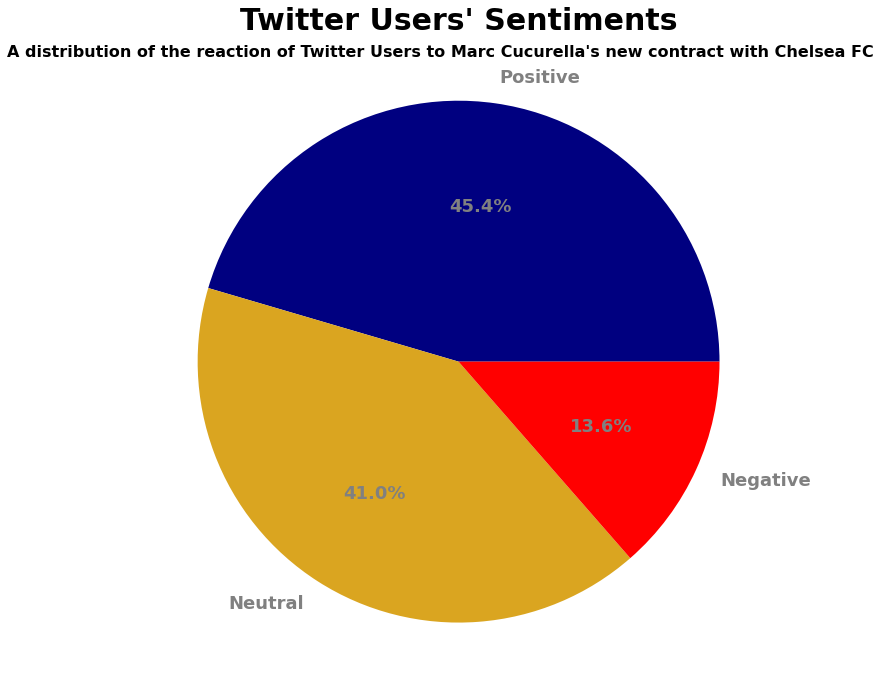

In [21]:
# To plot a pie chart to show different sentiments 
plt.figure(figsize=[20,12], facecolor='white')
plt.pie(sentiment_summary, labels =sentiment_summary.index, colors=['navy', 'goldenrod', 'red'], textprops={'fontsize':'18', 'color':'gray', 'fontweight':'bold'},autopct='%1.1f%%')
plt.title("Twitter Users' Sentiments", fontsize=30, color="black", fontweight="bold" )
plt.suptitle("A distribution of the reaction of Twitter Users to Marc Cucurella's new contract with Chelsea FC", y=0.87, fontsize=16, fontweight='bold')
plt.savefig('sentiment_summary.png')
plt.show()


Negative tweets represented only 13% of the total tweets

In [22]:
# To find the tweet with the highest number of likes
pd.DataFrame(marc_df[marc_df.num_of_likes == marc_df.num_of_likes.max()])

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,cleaned_tweet,polarity_score,sentiment
21072,Marc Cucurella deal details 🔵 #CFC\n\n▫️ Chels...,1555517272206327810,"Milano, Italia",5543,44842,2022-08-05,deal detail cfc ▫️ chelsra pay £55m guaranteed...,0.096591,Positive


In [23]:
# To find the tweet with the highest number of retweets
pd.DataFrame(marc_df[marc_df.num_of_retweets == marc_df.num_of_retweets.max()])

,tweet_text,tweet_id,tweeted_from,num_of_retweets,num_of_likes,date_of_tweet,cleaned_tweet,polarity_score,sentiment
9338,@IRvshman's account is temporarily unavailable...,1555836716740665344,Not Given,9747,0,2022-08-06,'s account temporarily unavailable violates tw...,0.0,Neutral


## To show the most frequent words using word cloud

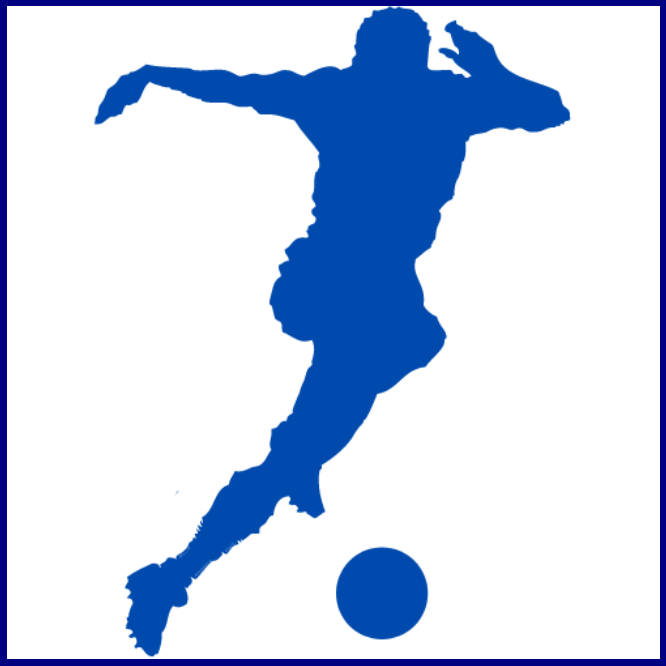

In [24]:
image = np.array(Image.open('footballer.png')) #imports image
plt.figure(figsize=[20,12], facecolor='navy') #defines plot area
plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off') #puts off the plot axis
plt.show() 

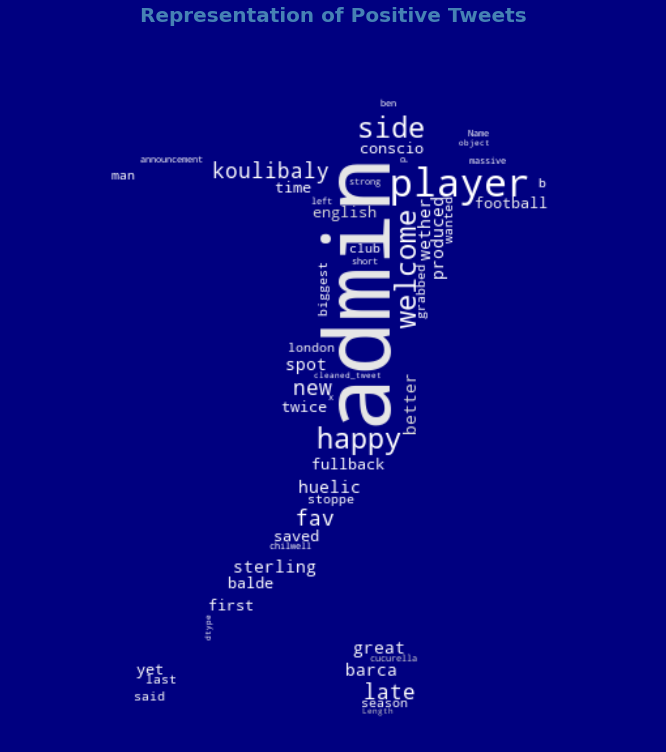

In [25]:
# I want to create two word clouds to show which words were more in the positive and negative tweets.
# For positive words
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(80, 140)

positive_words = marc_df['cleaned_tweet'][marc_df['sentiment'] == 'Positive']
positive_wc = WordCloud(max_font_size=70,background_color='navy', mask=image, random_state=1)
positive_wc.generate(str(positive_words))
plt.figure(figsize=[20,12], facecolor='navy')
plt.imshow(positive_wc.recolor(color_func=grey_color_func),interpolation="bilinear")
plt.axis('off')
plt.title('Representation of Positive Tweets',x=0.5, y=1.1, fontsize=20, color="steelblue", fontweight="bold");
plt.savefig('positive_tweets.png')
plt.show()


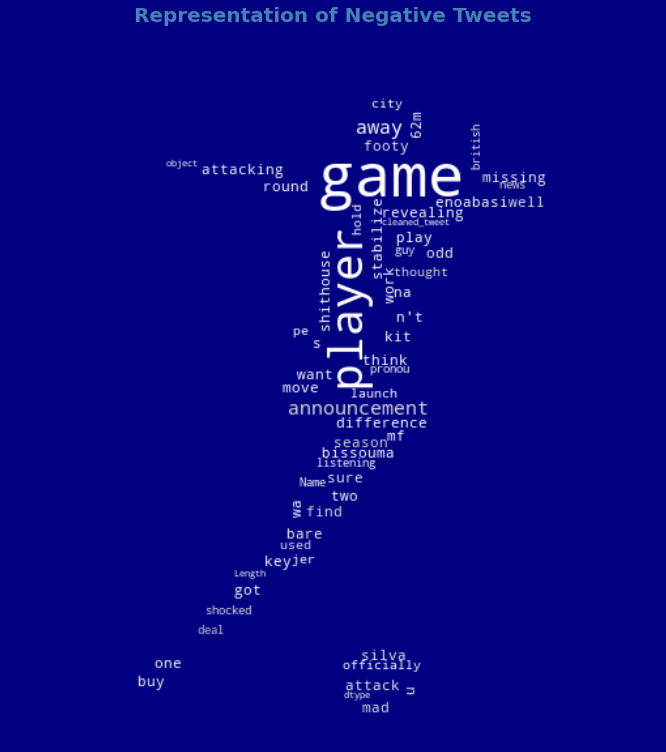

In [26]:
# For Negative words
negative_words = marc_df['cleaned_tweet'][marc_df['sentiment'] == 'Negative']
negative_wc = WordCloud(max_font_size=70,background_color='navy', mask=image, random_state=1)
negative_wc.generate(str(negative_words))
plt.figure(figsize=[20,12], facecolor='navy')
plt.imshow(negative_wc.recolor(color_func=grey_color_func),interpolation="bilinear")
plt.axis('off')
plt.title('Representation of Negative Tweets',x=0.5, y=1.1, fontsize=20, color='steelblue', fontweight="bold");
plt.savefig('negative_tweet.png')
plt.show()


## The Result
The result of this analysis shows that 45.4% of the tweets expressed positive sentiment, 41% was neutral and only 13.6% was negative.